In [46]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import save_img

sys.path.append('../src/')
from data_preparation import DataLoader, split_data_train_test

In [45]:
%load_ext autoreload
%autoreload 2

In [3]:
data_loader = DataLoader()
images, masks = data_loader.load_data(img_size=(224,224))

In [24]:
images_train, images_test, mask_train, mask_test = split_data_train_test(images, masks)

In [4]:
model = load_model('../models/unet_brain_segmentation.h5')

In [25]:
def visualise_image(index, images_list=images, masks_list=masks):
    f = plt.figure()
    f.add_subplot(1, 3, 1)
    plt.imshow(images_list[index])
    f.add_subplot(1, 3, 2)
    plt.imshow(masks_list[index])
    f.add_subplot(1, 3, 3)
    img = model.predict(np.expand_dims(images_list[index], axis=0)).reshape(224, 224, 1)
    img = np.where(img  > 0.5, img , 0)
    plt.imshow(img)

1/1 [==============================] - 0s 35ms/step


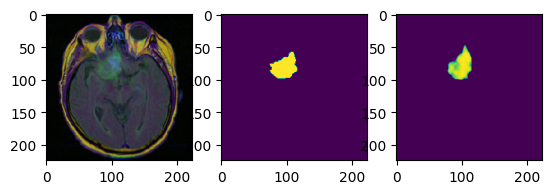

In [26]:
visualise_image(1)

1/1 [==============================] - 0s 21ms/step


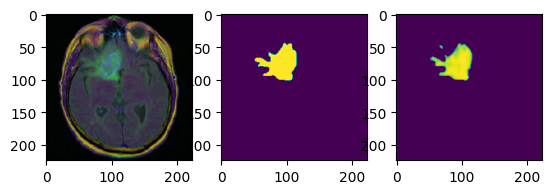

In [14]:
visualise_image(2)

1/1 [==============================] - 0s 21ms/step


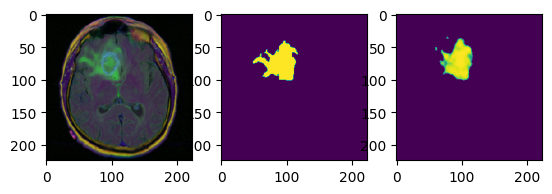

In [16]:
visualise_image(3)

1/1 [==============================] - 0s 21ms/step


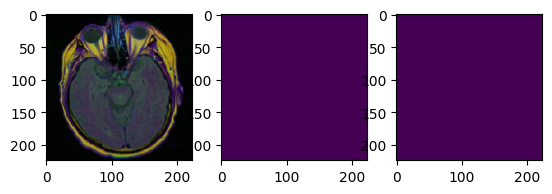

In [17]:
visualise_image(0)

1/1 [==============================] - 0s 21ms/step


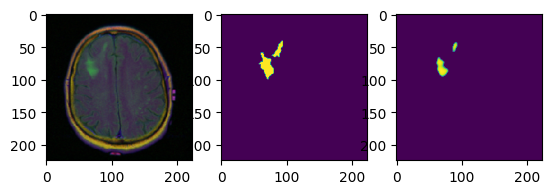

In [18]:
visualise_image(7)

1/1 [==============================] - 0s 20ms/step


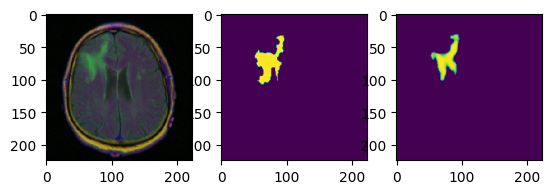

In [19]:
visualise_image(6)

1/1 [==============================] - 0s 19ms/step


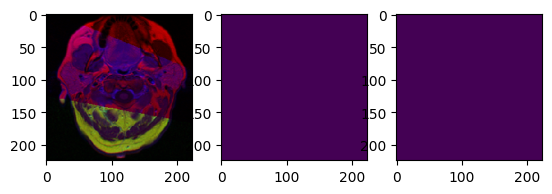

In [20]:
visualise_image(10)

1/1 [==============================] - 0s 20ms/step


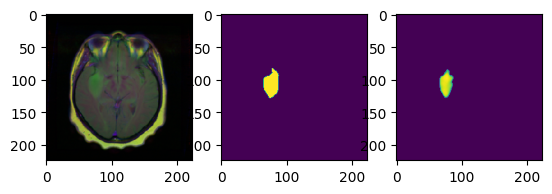

In [22]:
visualise_image(42)

Check for test set only

1/1 [==============================] - 0s 23ms/step


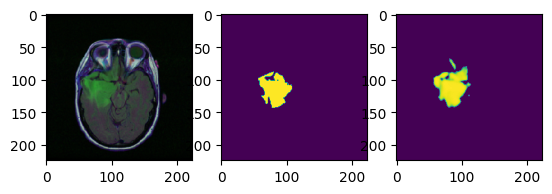

In [28]:
visualise_image(1, images_list=images_test, masks_list=mask_test)

1/1 [==============================] - 0s 21ms/step


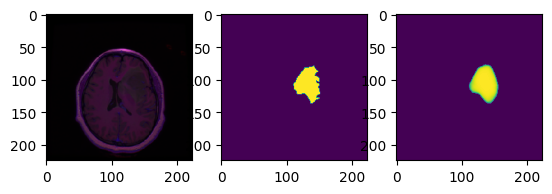

In [29]:
visualise_image(2, images_list=images_test, masks_list=mask_test)

1/1 [==============================] - 0s 27ms/step


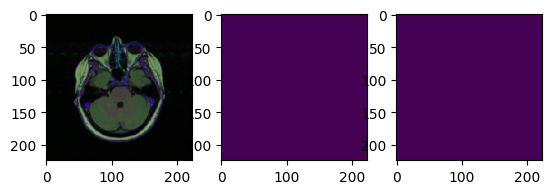

In [30]:
visualise_image(3, images_list=images_test, masks_list=mask_test)

1/1 [==============================] - 0s 22ms/step


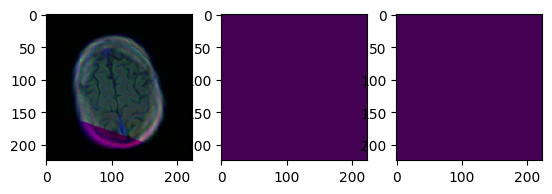

In [31]:
visualise_image(4, images_list=images_test, masks_list=mask_test)

1/1 [==============================] - 0s 22ms/step


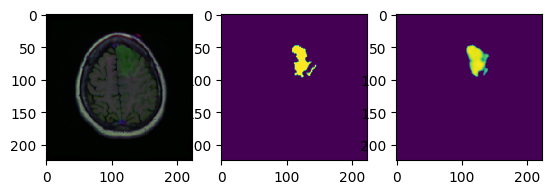

In [32]:
visualise_image(5, images_list=images_test, masks_list=mask_test)

1/1 [==============================] - 0s 23ms/step


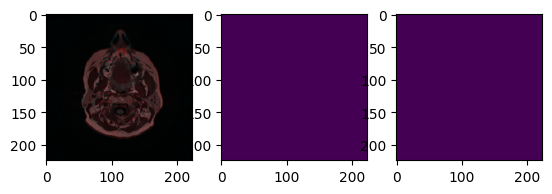

In [33]:
visualise_image(6, images_list=images_test, masks_list=mask_test)

1/1 [==============================] - 0s 21ms/step


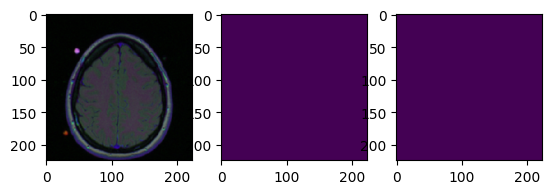

In [34]:
visualise_image(7, images_list=images_test, masks_list=mask_test)

1/1 [==============================] - 0s 23ms/step


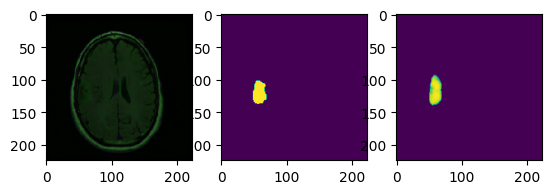

In [35]:
visualise_image(8, images_list=images_test, masks_list=mask_test)

1/1 [==============================] - 0s 19ms/step


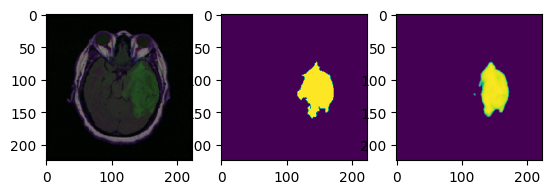

In [41]:
visualise_image(14, images_list=images_test, masks_list=mask_test)

Choose one patient and test model

Example: TCGA_DU_A5TS_19970726

In [48]:
images, masks = data_loader.load_data(img_size=(224,224), specific_patient="TCGA_DU_A5TS_19970726")

In [49]:
len(images)

35

In [61]:
def patient_plot(images, masks):
    f = plt.figure(figsize=(3,len(images)), dpi=300)
    for i, (img, mask) in enumerate(zip(images, masks)):
        f.add_subplot(len(images), 3, i*3+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        f.add_subplot(len(images), 3, i*3+2)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(mask)
        f.add_subplot(len(images), 3, i*3+3)
        img = model.predict(np.expand_dims(img, axis=0)).reshape(224, 224, 1)
        img = np.where(img  > 0.5, img , 0)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
    f.savefig("patient_data.png")
    

1/1 [==============================] - 0s 26ms/step


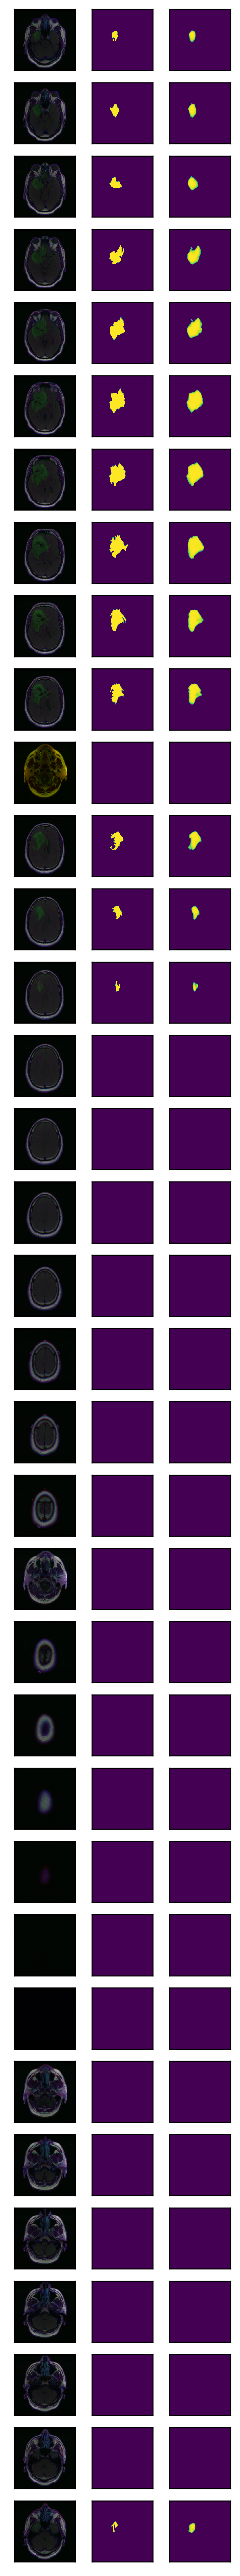

In [62]:
patient_plot(images, masks)